C:\Users\dcard\AppData\Local\Temp\ipykernel_2316\779044103.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  m2_usa = m2_usa.fillna(method="ffill")


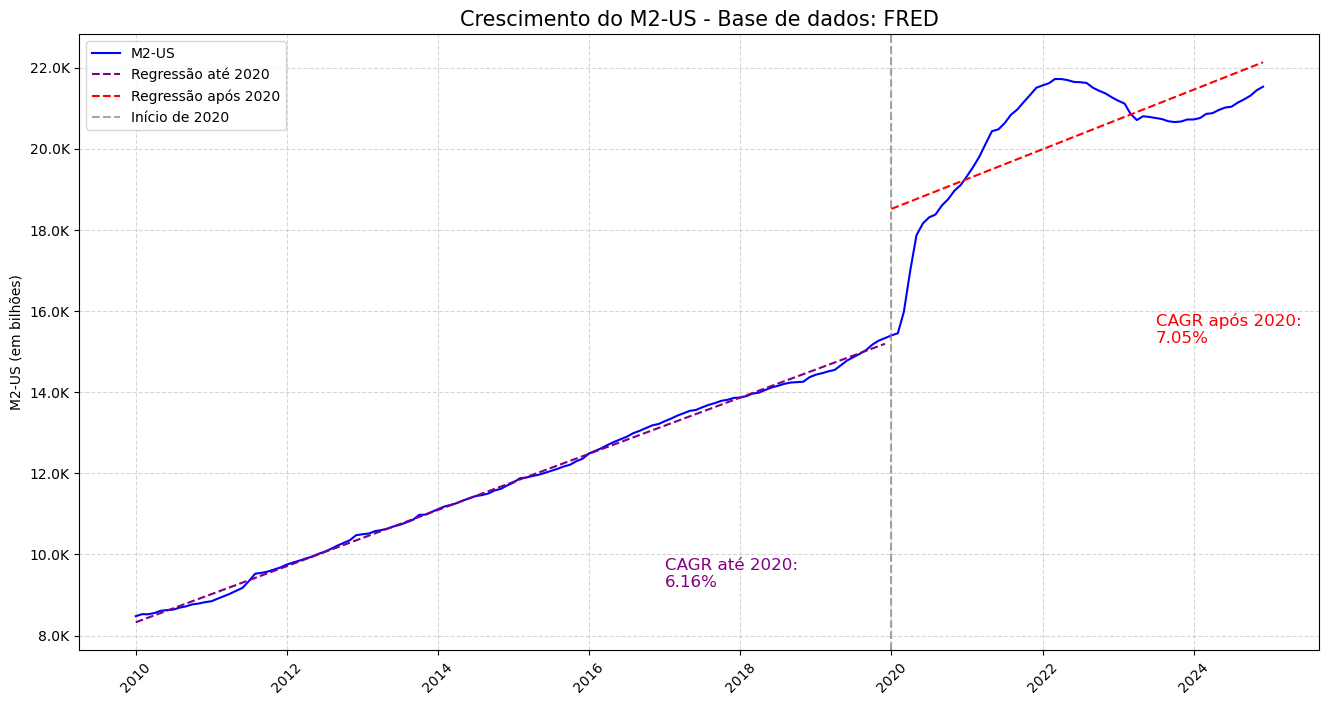

In [1]:
############### Crescimento do M2 Americano ###############

# Importa as bibliotecas

import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

# Definir período
end_date = datetime.date.today()
start_date = '2010-01-01'

m2_usa = web.DataReader("M2SL", "fred", start_date, end_date)
# Renomear a coluna para algo mais descritivo (opcional)
m2_usa = m2_usa.rename(columns={"DATE": "Date", "M2SL": "m2_us"})
# Preencher valores ausentes (propagação para frente, opcional)
m2_usa = m2_usa.fillna(method="ffill")

# Criar o gráfico principal
plt.figure(figsize=(16, 8))
plt.title("Crescimento do M2-US - Base de dados: FRED", fontsize=15)
plt.plot(m2_usa.index, m2_usa["m2_us"], label="M2-US", color="blue")

# Adicionar grid ao gráfico
plt.grid(True, linestyle="--", alpha=0.5)

# Configurar o eixo Y
plt.ylabel("M2-US (em bilhões)")

# Função para formatar o eixo Y em milhares/milhões/bilhões
def format_y(value, _):
    if value >= 1e9:
        return f'{value/1e9:.1f}B'  # Bilhões
    elif value >= 1e6:
        return f'{value/1e6:.1f}M'  # Milhões
    elif value >= 1e3:
        return f'{value/1e3:.1f}K'  # Milhares
    return f'{value:.0f}'  # Valor normal

# Aplicar a formatação ao eixo Y
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_y))

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

#---------------Cálculo das Regressão do período-------------------------#

# Separar os períodos antes e depois de 2020
m2_ate_2020 = m2_usa[m2_usa.index < "2020-01-01"]
m2_depois_2020 = m2_usa[m2_usa.index >= "2020-01-01"]

# Converter datas para valores numéricos
x_ate_2020 = (m2_ate_2020.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
x_depois_2020 = (m2_depois_2020.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Ajustar uma reta de regressão para cada período
coef_ate_2020 = np.polyfit(x_ate_2020, m2_ate_2020["m2_us"], 1)
coef_depois_2020 = np.polyfit(x_depois_2020, m2_depois_2020["m2_us"], 1)

# Criar as equações da reta
regressao_ate_2020 = np.poly1d(coef_ate_2020)
regressao_depois_2020 = np.poly1d(coef_depois_2020)

# Plotar as retas de regressão
plt.plot(m2_ate_2020.index, regressao_ate_2020(x_ate_2020), color="purple", linestyle="--", label="Regressão até 2020")
plt.plot(m2_depois_2020.index, regressao_depois_2020(x_depois_2020), color="red", linestyle="--", label="Regressão após 2020")

#---------------Cálculo das Regressão do período-------------------------#

#---------------Cálculo dos CAGR período-------------------------#

# Obter os valores iniciais e finais de cada período
V_i_ate_2020 = m2_ate_2020["m2_us"].iloc[0]
V_f_ate_2020 = m2_ate_2020["m2_us"].iloc[-1]
n_ate_2020 = (m2_ate_2020.index[-1] - m2_ate_2020.index[0]).days / 365.25

V_i_depois_2020 = m2_depois_2020["m2_us"].iloc[0]
V_f_depois_2020 = m2_depois_2020["m2_us"].iloc[-1]
n_depois_2020 = (m2_depois_2020.index[-1] - m2_depois_2020.index[0]).days / 365.25

# Calcular o CAGR (Crescimento Médio Anual)
cagr_ate_2020 = ((V_f_ate_2020 / V_i_ate_2020) ** (1 / n_ate_2020)) - 1
cagr_depois_2020 = ((V_f_depois_2020 / V_i_depois_2020) ** (1 / n_depois_2020)) - 1

# Exibir os valores no gráfico
x_texto_1 = m2_ate_2020.index[int(len(m2_ate_2020) * 0.7)]  # Posição 80% do período
x_texto_2 = m2_depois_2020.index[int(len(m2_depois_2020) * 0.7)]  # Posição 20% do período
y_pos_ate_2020 = m2_ate_2020["m2_us"].max() * 0.6  # 90% da altura máxima
y_pos_depois_2020 = m2_depois_2020["m2_us"].max() * 0.7

plt.text(x_texto_1, y_pos_ate_2020, f"CAGR até 2020:\n{cagr_ate_2020 * 100:.2f}%", fontsize=12, color="purple")
plt.text(x_texto_2, y_pos_depois_2020, f"CAGR após 2020:\n{cagr_depois_2020 * 100:.2f}%", fontsize=12, color="red")

#---------------Cálculo dos CAGR período-------------------------#

plt.axvline(pd.Timestamp("2020-01-01"), color="gray", linestyle="--", alpha=0.7, label="Início de 2020")

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()
